<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_classificationV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb

import cv2
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df1_test.csv'
df1_test= pd.read_csv(url)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem
import string

In [5]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower().apply(tokenizer.tokenize),name ='tokenize_desc')

In [6]:
all_words = [word for tokens in tokenize_desc for word in tokens]
from collections import Counter
count_all_words = Counter(all_words)
#count_all_words.most_common(100)

In [7]:
stopword_list = nltk_stop_words = nltk.corpus.stopwords.words('english') + list(count_all_words.most_common(100))


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories),name='class_labels')




In [9]:
list_labels = y
list_tokens = tokenize_desc

In [10]:
list_tokens

0      [key, features, of, elegance, polyester, multi...
1      [specifications, of, sathiyas, cotton, bath, t...
2      [key, features, of, eurospa, cotton, terry, fa...
3      [key, features, of, santosh, royal, fashion, c...
4      [key, features, of, jaipur, print, cotton, flo...
                             ...                        
923    [oren, empower, extra, large, self, adhesive, ...
924    [wallmantra, large, vinyl, sticker, sticker, p...
925    [buy, uberlyfe, extra, large, pigmented, polyv...
926    [buy, wallmantra, medium, vinyl, sticker, stic...
927    [buy, uberlyfe, large, vinyl, sticker, for, rs...
Name: tokenize_desc, Length: 928, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1_test.description,y, test_size=0.1, random_state=40)

In [12]:
X_train[:10]

787    Woven Terry Cotton Bath Towel (Bath Towel, Mul...
104    Specifications of Toffyhouse Baby Boy's Sleeps...
600    Buy Welhouse Cotton Hand & Face Towel Set at R...
454    Sonata 77036SM02J Watch - Buy Sonata 77036SM02...
31     Lenco Bdblue Tango Analog Watch  - For Men, Bo...
262    Specifications of Yves Bertelin YBSCR557 Analo...
253    Ndura Kadhai 1.7 L\r\n                        ...
92     Artisan Creation Checkered Single Quilts & Com...
370    Buy Zyxel VMG1312-B10A VDSL2 Wireless N VDSL2 ...
204    Agromech YIBOO Rolling Pizza Cutter (Stainless...
Name: description, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
print(bow["test"][0].shape)

(835, 4382)
(93, 4382)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


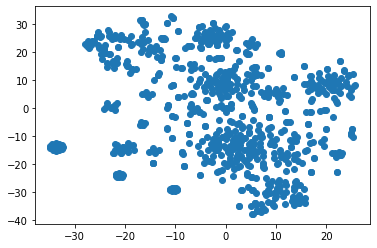

In [41]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2, perplexity=40)# représentation du DataSet via TSNE
X_tsne = tsne_2d.fit_transform(count_vectorizer.fit_transform(X_train))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1])

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
nb_classifier_tsne = MultinomialNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gb, X_tsne,y_train, cv=5, scoring='accuracy',error_score = 'raise')
labels_=gb.fit(X_tsne,y_train).predict(X_tsne)


In [52]:
pd.Series(labels_).nunique()

19

In [53]:
df1_test.categories.nunique()

24

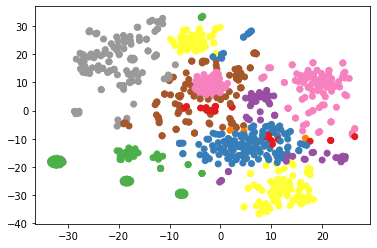

In [49]:
results = np.c_[X_tsne,labels_]
pd_result = pd.DataFrame(results)
plt.scatter(pd_result[0], pd_result[1], c=pd_result[2], cmap='Set1')

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [16]:
nb_classifier.fit(*bow["train"])

MultinomialNB()

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

array([0.75449102, 0.77245509, 0.78443114, 0.79041916, 0.77245509])

In [18]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

array([0.64670659, 0.63473054, 0.66467066, 0.65269461, 0.67664671])

In [19]:
#concat tfidf et vector_count
#kmeans pour retrouver les cat
#tsne pour reduc_dimension
#commencer le traitement d'image

Implémentation Kmeans


In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [21]:
kmeans= KMeans(n_clusters=24).fit(*bow["train"])

In [22]:
pd.crosstab(index=y_train, columns=kmeans.labels_)

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
class_labels,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,3
3,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2
5,1,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,18,0,0,18,11,0,10,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,2
7,3,0,0,0,14,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1
8,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
